In [580]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii 
from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit
import tensorflow as tf
from scipy import optimize
from scipy.stats import norm
import ast as ast
import re

#write down the data in a readable format
data = [(1, "8:07", 6.57),
    (1, "15:37", -0.39),
    (2, "8:55", 5.38),
    (2, "16:25", -1.74),
    (3, "9:45", 5.26),
    (4, "10:35", -1.36),
    (4, "18:00", -1.15),
    (5, "11:28", 3.48),
    (5, "18:46", -1.61),
    (6, "12:22", 2.62),
    (6, "19:31", 0.05),
    (7, "13:24", 1.83),
    (7, "20:16", 1.01),
    (8, "3:22", 3.57),
    (8, "21:01", 0.73),
    (9, "4:07", 4.54),
    (9, "21:46", 2.17),
    (10, "4:50", 3.76),
    (10, "11:58", 2.88),
    (11, "5:31", 3.90),
    (11, "12:56", 1.92),
    (12, "6:08", 4.73),
    (12, "13:45", 1.74),
    (13, "6:47", 5.66),
    (13, "14:25", 0.79),
    (14, "7:22", 5.33),
    (14, "15:00", -0.04),
    (15, "7:59", 5.23),
    (15, "15:34", -1.12),
    (16, "8:34", 6.67),
    (16, "16:08", -0.61),
    (17, "9:10", 4.74),
    (17, "16:41", -0.93),
    (18, "9:45", 4.69),
    (18, "17:12", -1.29),
    (19, "10:21", 4.20),
    (19, "17:45", 0.22),
    (20, "10:57", 3.68),
    (20, "18:15", 0.26),
    (21, "11:38", 2.47),
    (21, "18:48", 0.36),
    (22, "12:25", 2.59),
    (22, "19:20", 0.99),
    (23, "2:22", 4.10),
    (23, "19:52", 1.87),
    (24, "2:58", 3.17),
    (24, "20:30", 1.60),
    (25,  "3:37", 3.71),
    (25, "10:44", 3.10),
    (26, "4:23", 4.04),
    (26, "11:55", 2.49),
    (27, "5:15", 4.07),
    (27, "12:57", 2.18),
    (28, "6:09", 5.93),
    (28, "13:50", 0.70),
    (29, "7:05", 6.89),
    (29, "14:39", 0.21),
    (30, "7:58", 6.72),
    (30, "15:27", 0.22),
    (31, "8:50", 6.77),
    (31, "16:10", -1.68),
    (32, "9:40", 5.77),
    (32, "16:52", -1.32),
    (33, "10:30", 4.35),
    (33, "17:34", -0.73),
    (34, "11:19", 4.23),
    (34, "18:12", -0.38),
    (35, "12:10", 2.24),
    (35, "18:49", -0.61),
    (36, "1:32", 3.45),
    (36, "19:24", -0.46),
    (37, "2:13", 4.13),
    (37, "20:00", 1.21),
    (38, "2:54", 3.34),
    (38, "9:54", 2.58),
    (39, "3:39", 3.32),
    (39, "11:15", 3.26),
    (40, "4:29", 5.21),
    (40, "12:22", 2.39),
    (41, "5:21", 4.83),
    (41, "13:14", 2.41),]

#change the time into minutes 
def convert(d, t_str):
    p = d *24
    h, m = map(int, t_str.split(':'))
    t = p + h
    return t * 60 + m

result = [(entry[0], convert(entry[0], entry[1]), entry[2]) for entry in data]

#print out the data

#for entry in result:
    #print(entry)

#for entry in result:
    #print(entry[1])

#for entry in result:
    #print(entry[2])





x_data = [1927.0,2377.0,3415.0,3865.0,4905.0,6395.0,6840.0,7888.0,8326.0,9382.0,9811.0,10884.0,11296.0,11722.0,12781.0,13207.0,14266.0,14690.0,15118.0,16171.0,16616.0,17648.0,18105.0,19127.0,19585.0,20602.0,21060.0,22079.0,22534.0,23554.0,24008.0,25030.0,25481.0,26505.0,26952.0,27981.0,28425.0,29457.0,29895.0,30938.0,31368.0,32425.0,32840.0,33262.0,34312.0,34738.0,35790.0,36217.0,36644.0,37703,38155.0,39195.0,39657.0,40689.0,41150.0,42185.0,42639.0,43678.0,44127.0,45170.0,45610,46660.0,47092.0,48150.0,48574.0,49639.0,50052.0,51130.0,51529.0,51932.0,53004.0,53413,54480.0,54894.0,55314.0,56379.0,56835.0,57869.0,58342.0,59361.,59834.0]

y_data = [6.57, -0.39, 5.38, -1.74, 5.26, -1.36, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18,  5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32,  4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41]

x_dat = np.array(x_data)

y_dat = np.array(y_data)
                 


In [581]:
data = np.loadtxt('Group-data.txt', dtype=[('day', 'int'), ('time', 'U5'), ('height','float')])


In [582]:
day = data['day']
time = data['time']
values = data['height']

In [583]:
def minutes(d, t_str):
    p = d *24
    h, m = map(float, t_str.split(':'))
    t = p + h
    return t * 60 + m

for entry in data:
    entry['time'] = minutes(entry['day'], entry['time'])

print(data)




[( 1, '1927.',  6.57) ( 1, '2377.', -0.39) ( 2, '3415.',  5.38)
 ( 2, '3865.', -1.74) ( 3, '4905.',  5.26) ( 3, '5354.', -1.36)
 ( 4, '6395.',  4.13) ( 4, '6840.', -1.15) ( 5, '7888.',  3.48)
 ( 5, '8326.', -1.61) ( 6, '9382.',  2.62) ( 6, '9811.',  0.05)
 ( 7, '10884',  1.83) ( 7, '11296',  1.01) ( 8, '11722',  3.57)
 ( 8, '12781',  0.73) ( 9, '13207',  4.54) ( 9, '14266',  2.17)
 (10, '14690',  3.76) (10, '15118',  2.88) (11, '16171',  3.9 )
 (11, '16616',  1.92) (12, '17648',  4.73) (12, '18105',  1.74)
 (13, '19127',  5.66) (13, '19585',  0.79) (14, '20602',  5.33)
 (14, '21060', -0.04) (15, '22079',  5.23) (15, '22534', -1.12)
 (16, '23554',  6.67) (16, '24008', -0.61) (17, '25030',  4.74)
 (17, '25481', -0.93) (18, '26505',  4.69) (18, '26952', -1.29)
 (19, '27981',  4.2 ) (19, '28425',  0.22) (20, '29457',  3.68)
 (20, '29895',  0.26) (21, '30938',  2.47) (21, '31368',  0.36)
 (22, '32425',  2.59) (22, '32840',  0.99) (23, '33262',  4.1 )
 (23, '34312',  1.87) (24, '34738',  3.1

In [584]:
x_data = data['time']
y_data = data['height']

x_data = x_data.astype(float)

print(x_data.dtype)

arr = np.dstack((x_data, y_data))

array_1 =repr(arr)

print(array_1)

array = (['1927.', '6.57'],
        ['2377.', '-0.39'],
        ['3415.', '5.38'],
        ['3865.', '-1.74'],
        ['4905.', '5.26'],
        ['5354.', '-1.36'],
        ['6395.', '4.13'],
        ['6840.', '-1.15'],
        ['7888.', '3.48'],
        ['8326.', '-1.61'],
        ['9382.', '2.62'],
        ['9811.', '0.05'],
        ['10884', '1.83'],
        ['11296', '1.01'],
        ['11722', '3.57'],
        ['12781', '0.73'],
        ['13207', '4.54'],
        ['14266', '2.17'],
        ['14690', '3.76'],
        ['15118', '2.88'],
        ['16171', '3.9'],
        ['16616', '1.92'],
        ['17648', '4.73'],
        ['18105', '1.74'],
        ['19127', '5.66'],
        ['19585', '0.79'],
        ['20602', '5.33'],
        ['21060', '-0.04'],
        ['22079', '5.23'],
        ['22534', '-1.12'],
        ['23554', '6.67'],
        ['24008', '-0.61'],
        ['25030', '4.74'],
        ['25481', '-0.93'],
        ['26505', '4.69'],
        ['26952', '-1.29'],
        ['27981', '4.2'],
        ['28425', '0.22'],
        ['29457', '3.68'],
        ['29895', '0.26'],
        ['30938', '2.47'],
        ['31368', '0.36'],
        ['32425', '2.59'],
        ['32840', '0.99'],
        ['33262', '4.1'],
        ['34312', '1.87'],
        ['34738', '3.17'],
        ['35790', '1.6'],
        ['36217', '3.71'],
        ['36644', '3.1'],
        ['37703', '4.04'],
        ['38155', '2.49'],
        ['39195', '4.07'],
        ['39657', '2.18'],
        ['40689', '5.93'],
        ['41150', '0.7'],
        ['42185', '6.89'],
        ['42639', '0.21'],
        ['43678', '6.72'],
        ['44127', '0.22'],
        ['45170', '6.77'],
        ['45610', '-1.68'],
        ['46660', '5.77'],
        ['47092', '-1.32'],
        ['48150', '4.35'],
        ['48574', '-0.73'],
        ['49639', '4.23'],
        ['50052', '-0.38'],
        ['51130', '2.24'],
        ['51529', '-0.61'],
        ['51932', '3.45'],
        ['53004', '-0.46'],
        ['53413', '4.13'],
        ['54480', '1.21'],
        ['54894', '3.34'],
        ['55314', '2.58'],
        ['56379', '3.32'],
        ['56835', '3.26'],
        ['57869', '5.21'],
        ['58342', '2.39'],
        ['59361', '4.83'],
        ['59834', '2.41'])
#k = array[:, 0]
#print(k)

float64
array([[[ 1.9270e+03,  6.5700e+00],
        [ 2.3770e+03, -3.9000e-01],
        [ 3.4150e+03,  5.3800e+00],
        [ 3.8650e+03, -1.7400e+00],
        [ 4.9050e+03,  5.2600e+00],
        [ 5.3540e+03, -1.3600e+00],
        [ 6.3950e+03,  4.1300e+00],
        [ 6.8400e+03, -1.1500e+00],
        [ 7.8880e+03,  3.4800e+00],
        [ 8.3260e+03, -1.6100e+00],
        [ 9.3820e+03,  2.6200e+00],
        [ 9.8110e+03,  5.0000e-02],
        [ 1.0884e+04,  1.8300e+00],
        [ 1.1296e+04,  1.0100e+00],
        [ 1.1722e+04,  3.5700e+00],
        [ 1.2781e+04,  7.3000e-01],
        [ 1.3207e+04,  4.5400e+00],
        [ 1.4266e+04,  2.1700e+00],
        [ 1.4690e+04,  3.7600e+00],
        [ 1.5118e+04,  2.8800e+00],
        [ 1.6171e+04,  3.9000e+00],
        [ 1.6616e+04,  1.9200e+00],
        [ 1.7648e+04,  4.7300e+00],
        [ 1.8105e+04,  1.7400e+00],
        [ 1.9127e+04,  5.6600e+00],
        [ 1.9585e+04,  7.9000e-01],
        [ 2.0602e+04,  5.3300e+00],
        [ 2.1060e+04

1.9820767860117294
4.506346253089878
2.7057101941047907
1.4037940414327201
0.01798011805086816
6.572363344675068
4.459341494268925


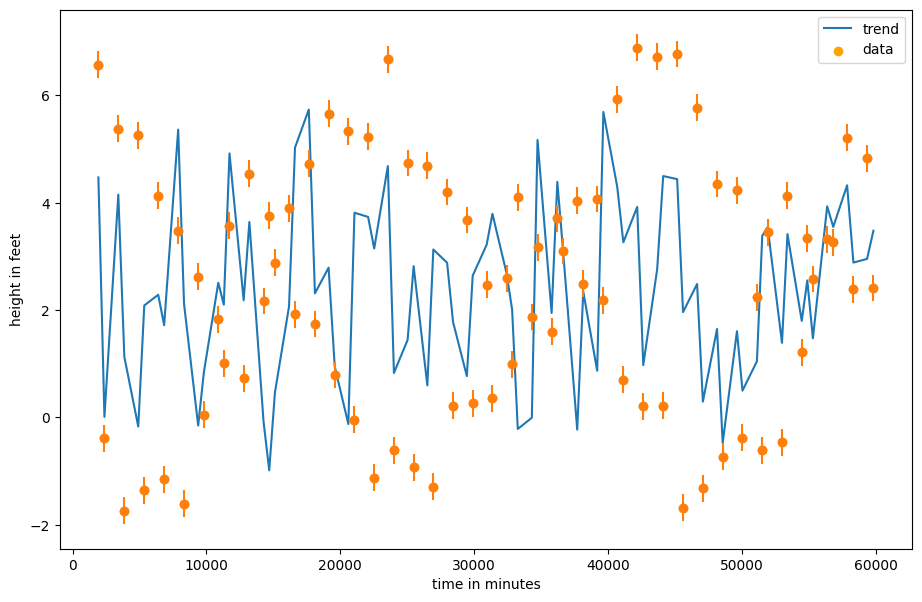

<Figure size 640x480 with 0 Axes>

In [585]:


def f_line(x,a, b, c, d, e, f, g):
    return 2 * (np.sin(x * b)-2.7057101941047907) - d * (np.cos(x * e)-6.572363344675068) - 1.4593414942689247
    #return  2.189333440988523 * (np.sin(x * 0.5063894176993958)-2.7057101941047907) - 0.8605692049055762 * (np.cos(x * 0.01803663692194345)-6.572363344675068) + 2.4593414942689247

init = [1.9820767860117294, 4.5063894176993958, 2.7057101941047907, 0.8605692049055762, 0.01803663692194345, 6.572363344675068, 4.4593414942689247]
sigma = np.full(len(y_data), 0.25)


popt, pcov = optimize.curve_fit(f_line, x_data, y_data, sigma = sigma, p0 = init)

af= popt[0]
bf= popt[1]
cf= popt[2]
df= popt[3]
ef= popt[4]
ff= popt[5]
gf= popt[6]



popt = af, bf, cf, df, ef, ff, gf

y_fit = f_line(x_data, *popt ) #af, bf, cf, df, ef, ff, gf

bt = [0, 10000, 20000, 30000, 40000, 50000, 60000]

print(af)
print(bf)
print(cf)
print(df)
print(ef)
print(ff)
print(gf)


plt.figure(figsize=(11,7))
plt.plot(x_data, y_fit, label = "trend")
#plt.plot(x_data, 2.189333440988523 * (np.sin(x_data * 0.5063894176993958)-2.7057101941047907) - 0.8605692049055762 * (np.cos(x_data * 0.01803663692194345)-6.572363344675068) + 2.4593414942689247, color='green')
y_err=0.25
#fig, ax =plt.subplots()
plt.scatter(x_data,y_data, label='data', color='orange')
plt.xlabel('time in minutes')
plt.ylabel('height in feet')
plt.xticks(bt)
plt.errorbar(x_data,y_data, yerr = y_err, fmt='o')
plt.legend()
plt.show()
plt.savefig("fit.pdf", bbox_inches="tight", dpi= 600)




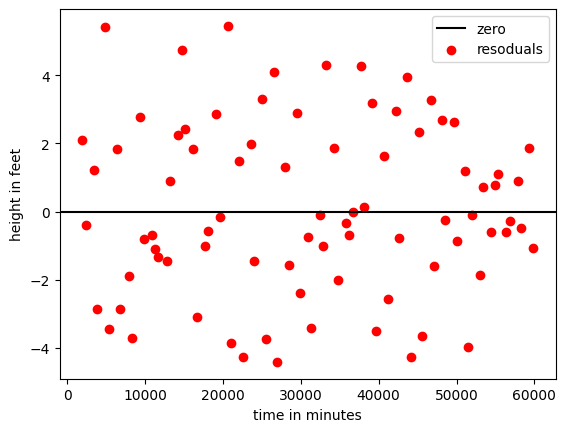

In [586]:
residuals = y_data - y_fit

plt.axhline(y=0, linestyle='-', label='zero', color='black')
plt.scatter(x_data, residuals, label='resoduals', color='red')
plt.xlabel("time in minutes")
plt.ylabel("height in feet")
plt.legend()

In [587]:
residual_mean = np.mean(residuals) 
residual_std = np.std(residuals)
print(f'mean residual is {residual_mean}.')
print(f'RMS residual is {residual_std}.')

mean residual is 0.08388913549800882.
RMS residual is 2.5076410324701808.


In [588]:
def gaussian(x, mu, s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

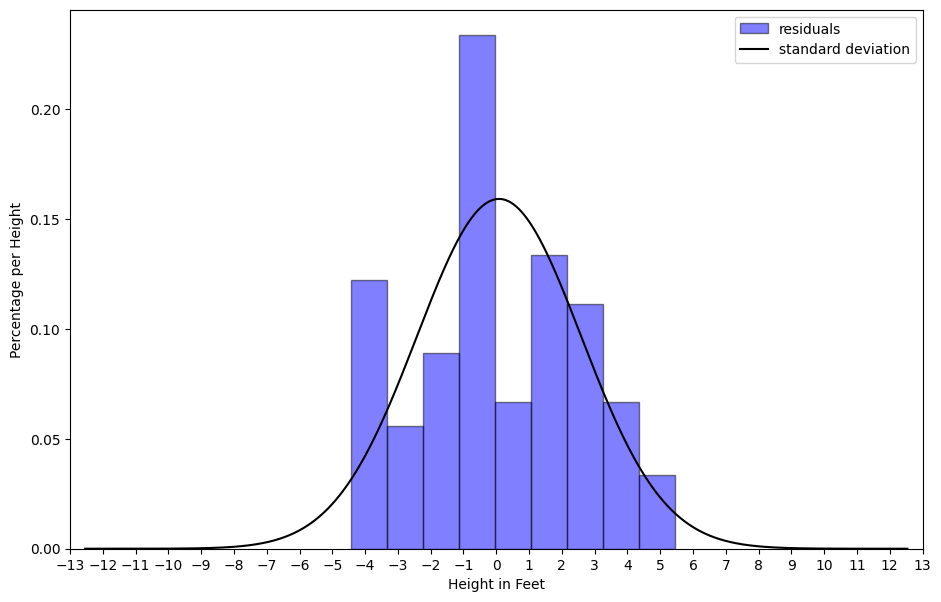

In [589]:
s = int(np.floor(np.sqrt(82)))

plt.figure(figsize=(11,7))
plt.hist(residuals, label='residuals', bins = s, alpha = 0.5, color = 'blue', edgecolor='black', density=True)
ax = plt.subplot(1,1,1)

x_g = np.linspace(-5*residual_std, 5* residual_std, 1000)
ax.plot(x_g, gaussian(x_g,residual_mean,residual_std), color='black', label='standard deviation')
ax.set_xlim([-8,8])

plt.xlabel('Height in Feet')
plt.ylabel('Percentage per Height')
plt.xticks([-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.tick_params(axis='both', which = 'minor')
plt.legend()
plt.savefig('histogram.pdf',bbox_inches='tight', dpi=600)
plt.show()



2.5076410324701808


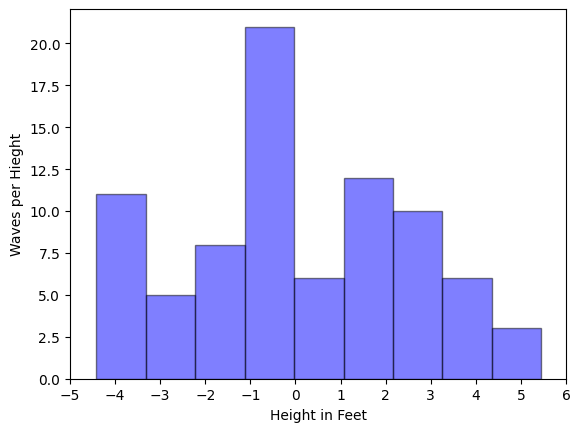

In [590]:

s = int(np.floor(np.sqrt(82)))


plt.hist(residuals, label='residuals', bins = s, alpha = 0.5, color = 'blue', edgecolor='black')
plt.xlabel('Height in Feet')
plt.ylabel('Waves per Hieght')
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.tick_params(axis='both', which = 'minor')
std = np.std(residuals)
print(std)
plt.savefig('histogram.pdf',bbox_inches='tight', dpi=600)



In [591]:
nx_data = np.array([1927.0,2377.0,3415.0,3865.0,4905.0,6395.0,6840.0,7888.0,8326.0,9382.0,9811.0,10884.0,11296.0,11722.0,12781.0,13207.0,14266.0,14690.0,15118.0,16171.0,16616.0,17648.0,18105.0,19127.0,19585.0,20602.0,21060.0,22079.0,22534.0,23554.0,24008.0,25030.0,25481.0,26505.0,26952.0,27981.0,28425.0,29457.0,29895.0,30938.0,31368.0,32425.0,32840.0,33262.0,34312.0,34738.0,35790.0,36217.0,36644.0,37703,38155.0,39195.0,39657.0,40689.0,41150.0,42185.0,42639.0,43678.0,44127.0,45170.0,45610,46660.0,47092.0,48150.0,48574.0,49639.0,50052.0,51130.0,51529.0,51932.0,53004.0,53413,54480.0,54894.0,55314.0,56379.0,56835.0,57869.0,58342.0,59361.0,59834.0,60761.0])

ny_data = np.array([6.57, -0.39, 5.38, -1.74, 5.26, -1.36, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18,  5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32,  4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41, 9.5])




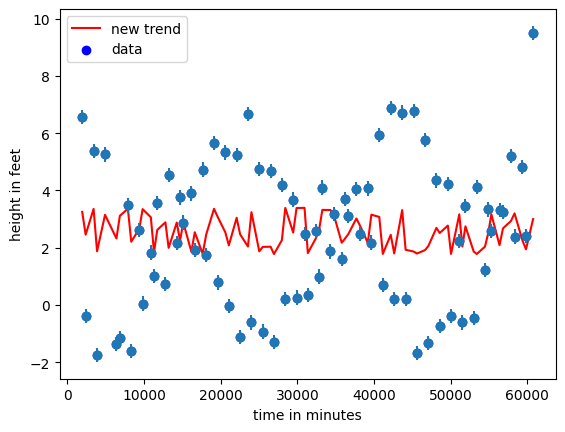

<Figure size 640x480 with 0 Axes>

In [592]:
def f_line(x,a, b, c, d, e, f, g):
    return a * (np.sin(x * b)-c) + d * (np.cos(x * e)-f) +g
    


sigma = np.full(len(ny_data), 0.25)


popt, pcov = optimize.curve_fit(f_line, nx_data, ny_data, sigma = sigma, p0 = [10, 0.5, 0, 1, 0.02, 1, 0.5])

af= popt[0]
bf= popt[1]
cf= popt[2]
df= popt[3]
ef= popt[4]
ff= popt[5]
gf= popt[6]
ny_fit = nf_line(nx_data, *npopt)


plt.plot(nx_data, nf_line(nx_data, *npopt), label = "new trend", color='red')
y_err=0.25
plt.scatter(nx_data,ny_data, label='data', color='blue')
plt.xlabel('time in minutes')
plt.ylabel('height in feet')
plt.errorbar(nx_data,ny_data, yerr = y_err, fmt='o')
plt.legend()
plt.show()
plt.savefig("new_fit.pdf", bbox_inches="tight", dpi= 600)

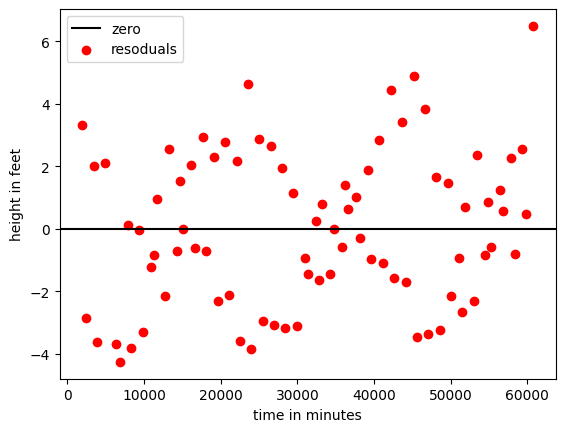

In [593]:
nresiduals = ny_data - ny_fit

plt.axhline(y=0, linestyle='-', label='zero', color='black')
plt.scatter(nx_data, nresiduals, label='resoduals', color='red')
plt.xlabel("time in minutes")
plt.ylabel("height in feet")
plt.legend()

In [594]:
nresidual_mean = np.mean(nresiduals) 
nresidual_std = np.std(nresiduals)
print(f'new mean residual is {residual_mean}.')
print(f'new RMS residual is {residual_std}.')

new mean residual is 0.08388913549800882.
new RMS residual is 2.5076410324701808.


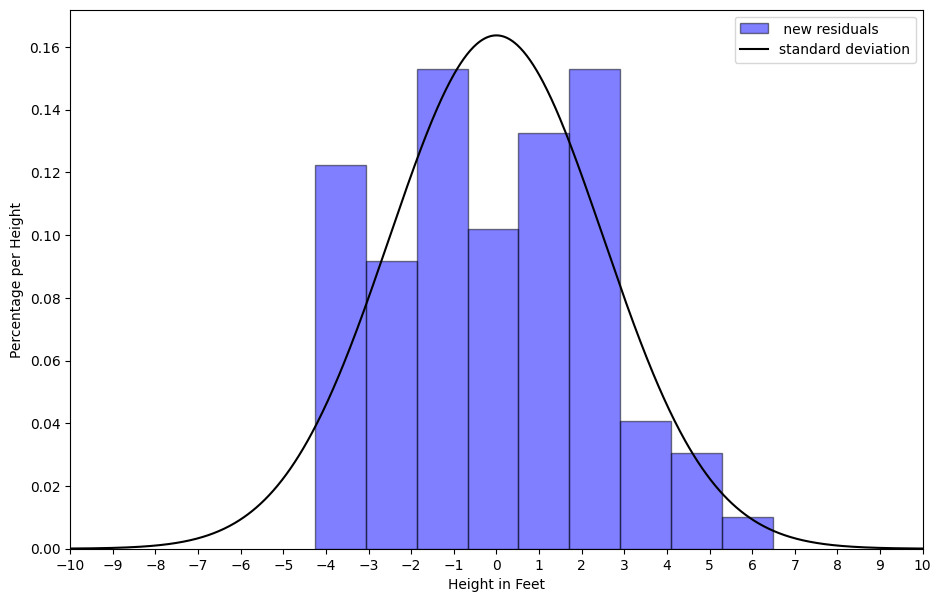

In [595]:
s = int(np.floor(np.sqrt(83)))

plt.figure(figsize=(11,7))
plt.hist(nresiduals, label=' new residuals', bins = s, alpha = 0.5, color = 'blue', edgecolor='black', density=True)
ax = plt.subplot(1,1,1)

nx_g = np.linspace(-5*nresidual_std, 5* nresidual_std, 1000)
ax.plot(x_g, gaussian(nx_g,nresidual_mean,nresidual_std), color='black', label='standard deviation')
ax.set_xlim([-8,8])

plt.xlabel('Height in Feet')
plt.ylabel('Percentage per Height')
plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
plt.tick_params(axis='both', which = 'minor')
plt.legend()
plt.savefig('new_histogram.pdf',bbox_inches='tight', dpi=600)
plt.show()